In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Img_plane = cv2.imread('./images/plane-1.jpg')
Img_donkey = cv2.imread('./images/donkey.png', -1)
Img_gt20 = cv2.imread('./images/GT20.png', cv2.IMREAD_UNCHANGED)
Img_gt26 = cv2.imread('./images/GT26_input.jpg', 0)
Img_8cell = cv2.imread('./images/8cell.png', -1)
Tech_Img = cv2.imread('./images/Tech.jpg', -1)

B, G, R = cv2.split(Img_plane)

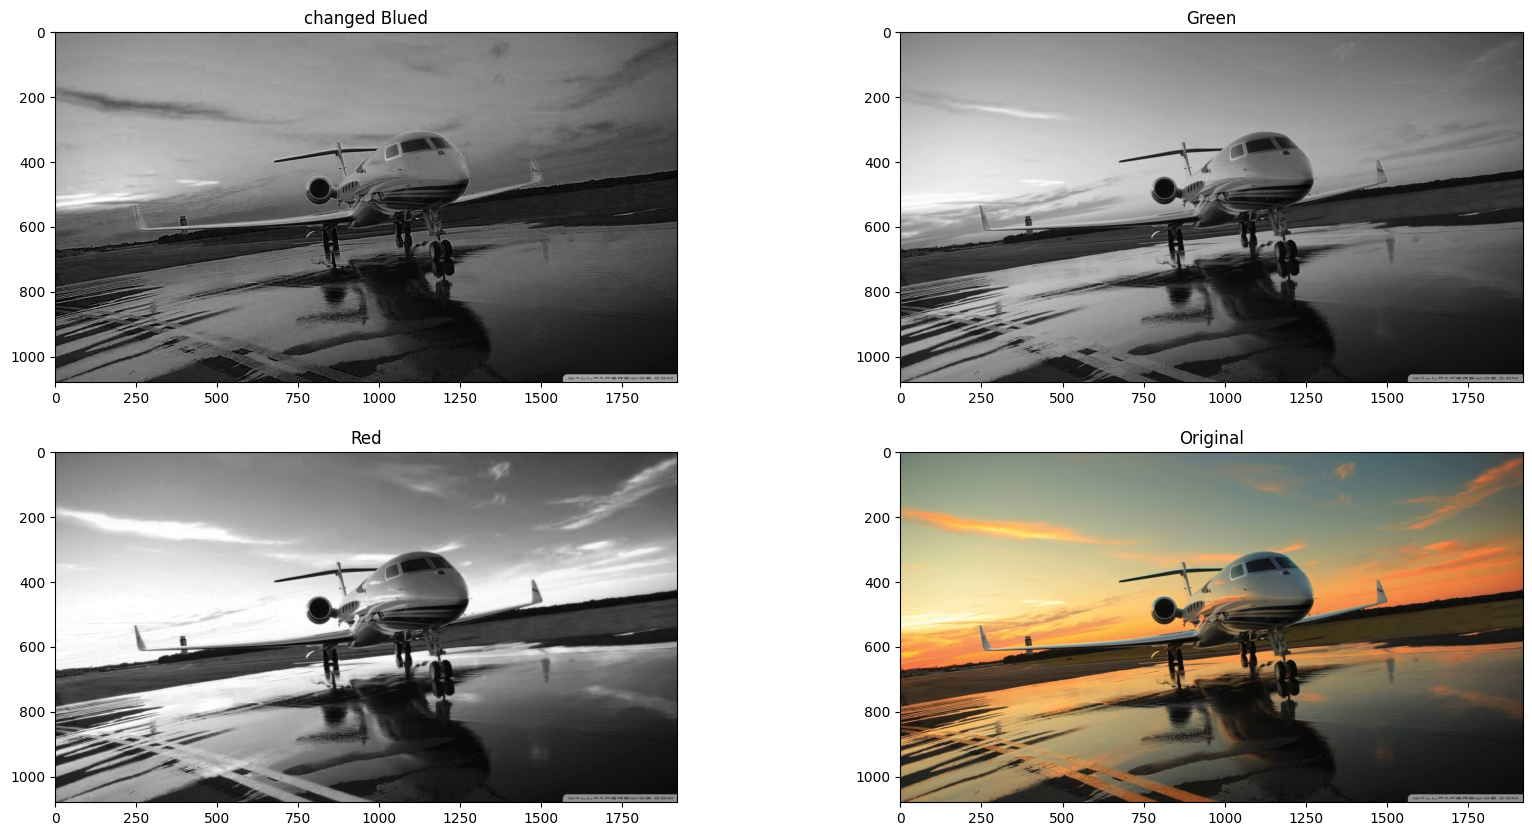

In [13]:
# the commented below line is incorrect change a channel color:
# changedB = B + 100

# first way to change color of a channel
changedB = B.astype('int16') + 30
changedB = np.minimum(changedB, 255)
changedB = changedB.astype('uint8')

# second way:
# changedB = cv2.add(B, 30)

plt.figure(figsize=[20,10])
plt.subplot(221);plt.imshow(changedB, cmap = 'gray');plt.title('changed Blued');
plt.subplot(222);plt.imshow(G, cmap = 'gray'); plt.title('Green');
plt.subplot(223);plt.imshow(R, cmap = 'gray'); plt.title('Red');
plt.subplot(224);plt.imshow(Img_plane[:,:,::-1]);plt.title('Original');

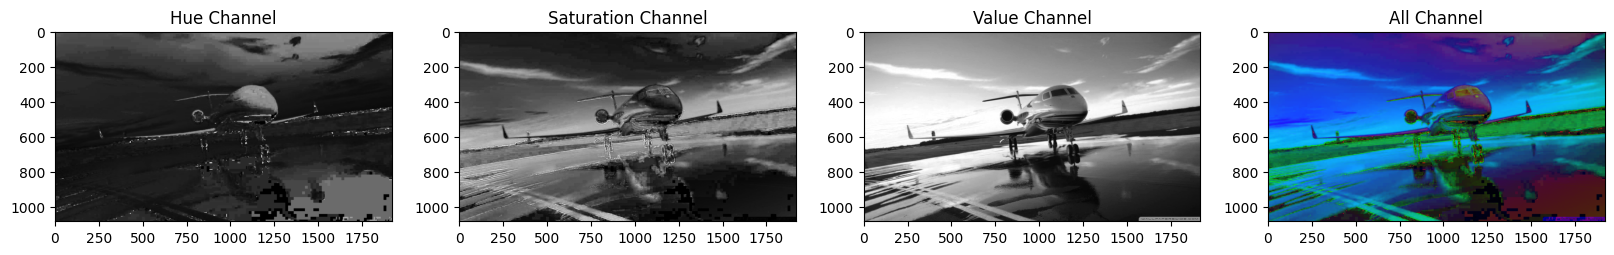

In [37]:
HSV_plane = cv2.cvtColor(Img_plane, 40)
plt.figure(figsize=[20,10])
plt.subplot(141);plt.imshow(HSV_plane[:,:,0], cmap = 'gray');plt.title('Hue Channel');
plt.subplot(142);plt.imshow(HSV_plane[:,:,1], cmap = 'gray');plt.title('Saturation Channel');
plt.subplot(143);plt.imshow(HSV_plane[:,:,2], cmap = 'gray');plt.title('Value Channel');
plt.subplot(144);plt.imshow(HSV_plane[:,:,:]);plt.title('All Channel');


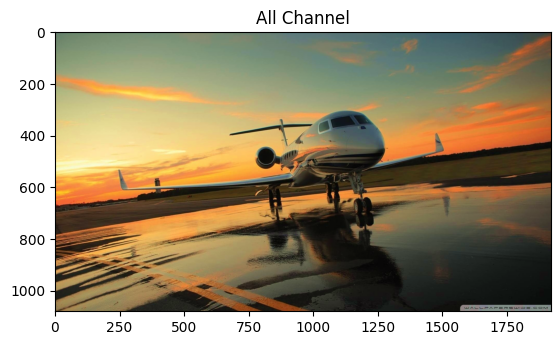

In [59]:
# here we changed Saturation Channel:
Mod_HSV_plane = cv2.merge([HSV_plane[:,:,0], cv2.add(HSV_plane[:,:,1], 20), HSV_plane[:,:,2]])
Mod_HSV_plane = cv2.cvtColor(Mod_HSV_plane, cv2.COLOR_HSV2RGB)
plt.imshow(Mod_HSV_plane);plt.title('All Channel');

Text(0.5, 1.0, 'RGB channel')

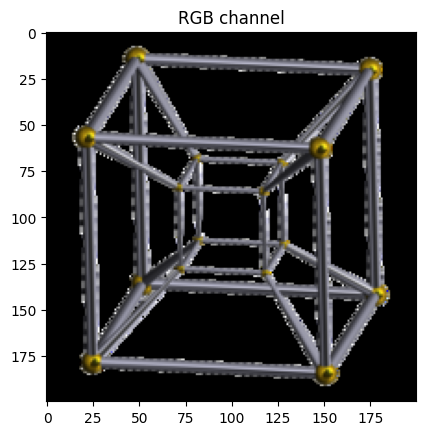

In [42]:
Img_8cell2 = cv2.cvtColor(Img_8cell, cv2.COLOR_BGR2RGB)
plt.imshow(Img_8cell2[:,:,:3]);plt.title('RGB channel')

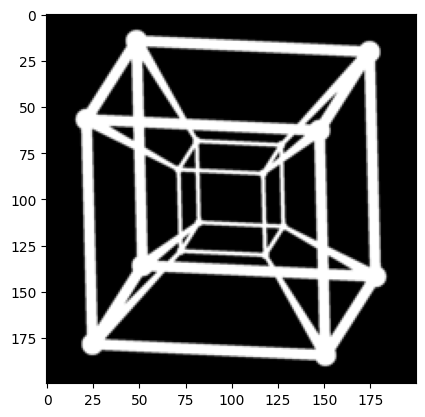

In [40]:
plt.imshow(Img_8cell[:,:,-1],cmap='gray')

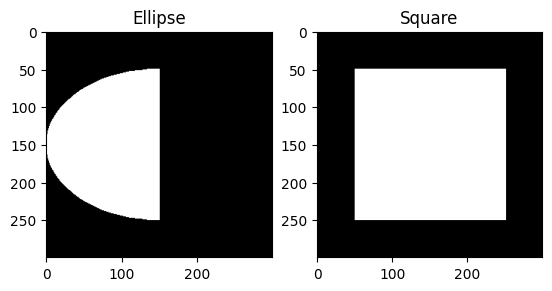

In [17]:
ellipse = np.zeros((300,300), dtype = 'uint8')
square = np.zeros((300,300), dtype = 'uint8')
cv2.ellipse(ellipse, (150, 150), (100, 150), 90, 0, 180, 255, -1)
cv2.rectangle(square, (50, 50), (250, 250), 255, -1)
plt.subplot(121);plt.imshow(ellipse, cmap='gray');plt.title('Ellipse');
plt.subplot(122);plt.imshow(square, cmap='gray');plt.title('Square');


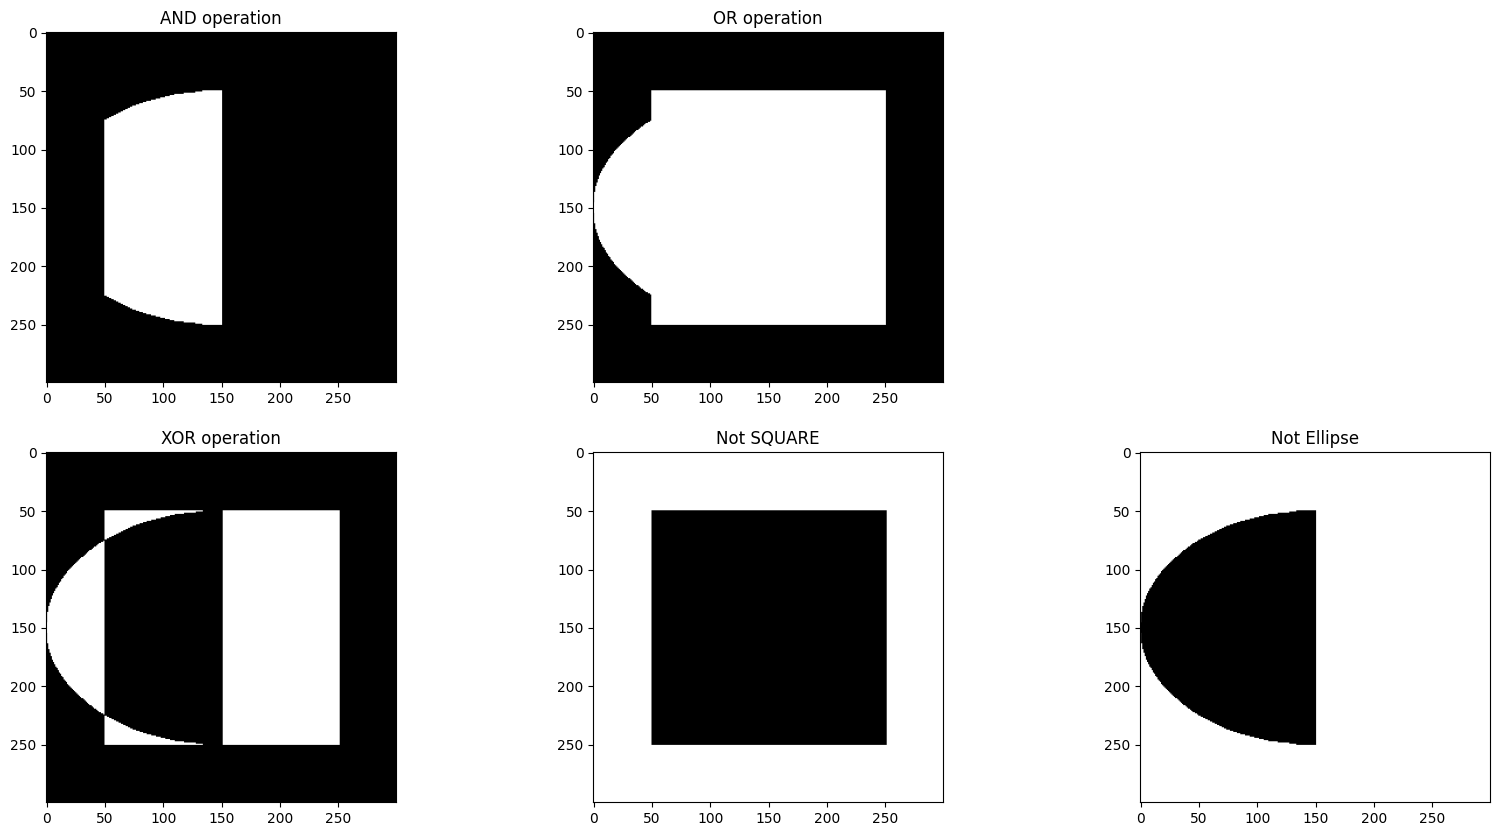

In [21]:
#Bitwise Operations:
bitAND = cv2.bitwise_and(square, ellipse)
bitOR  = cv2.bitwise_or(square, ellipse)
bitXOR = cv2.bitwise_xor(square, ellipse)
bitNOT = cv2.bitwise_not(square)
bitNOTE = cv2.bitwise_not(ellipse)


plt.figure(figsize=[20,10])
plt.subplot(231);plt.imshow(bitAND, cmap='gray'); plt.title('AND operation');
plt.subplot(232);plt.imshow(bitOR, cmap='gray');  plt.title('OR operation');
plt.subplot(234);plt.imshow(bitXOR, cmap='gray');plt.title('XOR operation');
plt.subplot(235);plt.imshow(bitNOT, cmap='gray'); plt.title('Not SQUARE');
plt.subplot(236);plt.imshow(bitNOTE, cmap='gray');plt.title('Not Ellipse');